In [4]:
using Logging
using BenchmarkTools
include("driver.jl")
include("visual.jl")

Logging.disable_logging(Logging.Warn);

Plots.AnimatedGif("C:\\Users\\ryara\\AppData\\Local\\Temp\\jl_CTEdGvsB8D.gif")
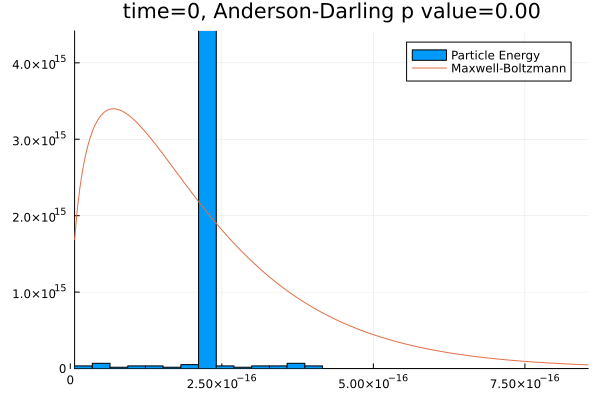

In [5]:
#Test 1 - Simple Argon Gas
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
display(plot_thermalization(samp))

In [6]:
#Test 2 - Simple Argon Gas Runtime
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)

#run first time to compile
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)

@benchmark begin 
    sys = System($L, $Ncell, $argon, 1.78, 2000, 400.)
    samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
end

BenchmarkTools.Trial: 21 samples with 1 evaluation.
 Range (min … max):  231.539 ms … 251.600 ms  ┊ GC (min … max): 0.00% … 2.08%
 Time  (median):     238.803 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   240.107 ms ±   4.851 ms  ┊ GC (mean ± σ):  0.69% ± 0.89%

  ▁        ▁▁▁   ▁█ ▁▁▁ ▁  ▁   ▁  █   ▁▁   ▁▁  ▁              ▁  
  █▁▁▁▁▁▁▁▁███▁▁▁██▁███▁█▁▁█▁▁▁█▁▁█▁▁▁██▁▁▁██▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  232 ms           Histogram: frequency by time          252 ms <

 Memory estimate: 28.45 MiB, allocs estimate: 323123.